In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

In [74]:
df = pd.read_csv(r'C:\Users\51686\OneDrive - Dublin City Council\Desktop\Chris\Strava\Combined_Cyclecounters_daily.csv')


In [ ]:
df

## Load and add dummies to Strava Data

In [40]:
# Convert the 'time' column to datetime format with the correct date format
df['time'] = pd.to_datetime(df['time'], dayfirst=True)

# Extract the date from the 'time' column
df['time'] = df['time'].dt.date

# Group by the 'date' column and sum the 'total_trip_count'
df = df.groupby(['time','location']).sum().reset_index()

print(df)

             time                      location  value
0      2020-01-01              Charleville Mall   23.0
1      2020-01-01              Grove Road Totem  703.0
2      2020-01-01                  Guild Street  316.0
3      2020-01-01                  North Strand  672.0
4      2020-01-02              Charleville Mall   72.0
...           ...                           ...    ...
21899  2023-12-31     Sheriff Street Upper - CC    0.0
21900  2023-12-31  Sir John Rogersons Quay - CC    0.0
21901  2023-12-31      South Circular Road - CC    0.0
21902  2023-12-31       St Johns Road West - CC    0.0
21903  2023-12-31        Summerhill Parade - CC    0.0

[21904 rows x 3 columns]


In [17]:
df

,date,total_trip_count
0,2021-01-01,2320
1,2021-01-02,2515
2,2021-01-03,1745
3,2021-01-04,455
4,2021-01-05,1125
...,...,...
1058,2023-11-27,410
1059,2023-11-28,1200
1060,2023-11-29,765
1061,2023-11-30,645


In [75]:
# Convert the 'time' column to datetime format with the correct date format
df['time'] = pd.to_datetime(df['time'], format='mixed', dayfirst=True)

In [5]:
# Extract the month from the 'time' column
df['month'] = df['date'].dt.month

# Generate dummy variables for the month
month_dummies = pd.get_dummies(df['month'], prefix='month')

# Convert boolean values to 1/0 (this step is technically redundant because `get_dummies` does this by default)
month_dummies = month_dummies.astype(int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, month_dummies], axis=1)

# Drop the original 'month' column
df = df.drop(columns=['month'])

# Create the 'Weekday_1' variable
df['Weekday_1'] = df['date'].dt.weekday < 5  # True for Monday(0) to Friday(4), False for Saturday(5) and Sunday(6)
df['Weekday_1'] = df['Weekday_1'].astype(int)  # Convert boolean to 1/0

In [ ]:
df

### Weekly transformation 

In [8]:
df = df[['date','total_trip_count','rain']]

In [ ]:
df

In [76]:
# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Define a resampling function that only sums the 'value' column
def resample_weekly(group):
    resampled_group = group.resample('W').sum()
    resampled_group['location'] = group['location'].iloc[0]
    return resampled_group

# Apply the resampling function to each location group
resampled_df = df.groupby('location').apply(resample_weekly).reset_index(level=0, drop=True).reset_index()

print(resampled_df)

           time                location  value
0    2023-01-01   Alfie Bryne Road - CC    0.0
1    2023-01-08   Alfie Bryne Road - CC    0.0
2    2023-01-15   Alfie Bryne Road - CC    0.0
3    2023-01-22   Alfie Bryne Road - CC    0.0
4    2023-01-29   Alfie Bryne Road - CC    0.0
...         ...                     ...    ...
3160 2023-12-03  Summerhill Parade - CC    0.0
3161 2023-12-10  Summerhill Parade - CC    0.0
3162 2023-12-17  Summerhill Parade - CC    0.0
3163 2023-12-24  Summerhill Parade - CC    0.0
3164 2023-12-31  Summerhill Parade - CC    0.0

[3165 rows x 3 columns]


C:\Users\51686\AppData\Local\Temp\ipykernel_19532\1914235379.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resampled_df = df.groupby('location').apply(resample_weekly).reset_index(level=0, drop=True).reset_index()


In [ ]:
resampled_df

In [8]:




# Extract the month from the 'time' column (week ending dates)
weekly_df['month'] = weekly_df['date'].dt.month

# Generate dummy variables for the month
month_dummies = pd.get_dummies(weekly_df['month'], prefix='month')

# Convert boolean values to 1/0
month_dummies = month_dummies.astype(int)

# Concatenate the dummy variables with the resampled DataFrame
weekly_df = pd.concat([weekly_df, month_dummies], axis=1)

# Drop the original 'month' column
weekly_df = weekly_df.drop(columns=['month'])

# Create the 'Weekday_1' variable
# Since we're working with weekly data, 'Weekday_1' should indicate if the week includes any weekdays (i.e., it will always be 1)
weekly_df['Weekday_1'] = 1


In [ ]:
weekly_df

### predicted values for C2CC

In [12]:
import matplotlib.pyplot as plt

In [8]:
df_daily = pd.read_csv(r'C:\Users\51686\OneDrive - Dublin City Council\Desktop\Chris\Strava\C2CC daily prediction.csv')
df_weekly = pd.read_csv(r'C:\Users\51686\OneDrive - Dublin City Council\Desktop\Chris\Strava\C2CC weekly prediction.csv')

In [ ]:
df_daily

In [ ]:
df_weekly

In [9]:
# Convert the 'time' column to datetime format with the correct date format
df_weekly['date'] = pd.to_datetime(df_weekly['date'], format='%d/%m/%Y', dayfirst=True)

# Set the 'time' column as the index
df_weekly.set_index('date', inplace=True)

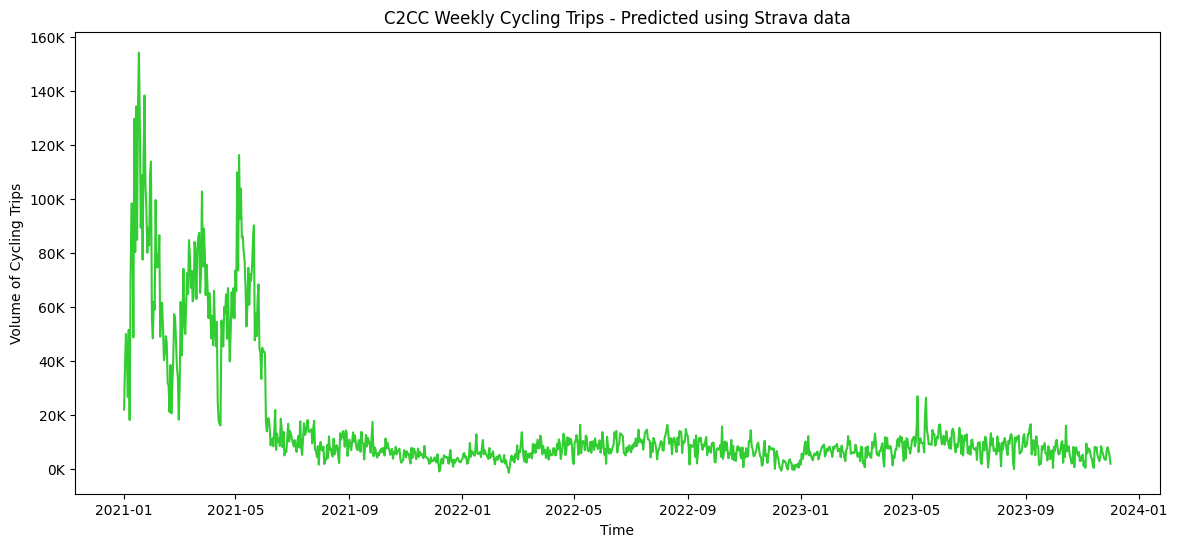

In [12]:
# Function to format y-axis labels to 'thousands'
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'
# Create the plot with a wider figure size
plt.figure(figsize=(14, 6))  # Width is 14, height is 6

# Plot the data
plt.plot(df_weekly['Prediction'], color='limegreen')

# Add titles and labels
plt.title('C2CC Weekly Cycling Trips - Predicted using Strava data')
plt.xlabel('Time')
plt.ylabel('Volume of Cycling Trips')

# Format y-axis labels to 'thousands'
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Show the plot
plt.show()